In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from scipy import stats
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
bhv_df = pd.read_csv('behaviour_data.csv')

In [4]:
bhv_df.describe()

,income,total_saved,total_debt,avg_trans_amt,total_trans_amt,total_no_transactions,savings_acct_active,credit_acct_active
count,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000
mean,23079.980422,243.469744,43.436702,-1.850820,-918.540949,116.807229,0.564759,0.637048
std,22215.443625,873.201468,1716.256431,113.441060,2707.684972,56.615361,0.496162,0.481214
min,0.000000,-2406.270000,-9633.490000,-189.325862,-13384.540000,1.000000,0.000000,0.000000
25%,7458.000000,0.000000,-22.672500,-18.412006,-2474.237500,71.000000,0.000000,0.000000
50%,17598.000000,0.000000,0.000000,-3.297455,-284.460000,123.000000,1.000000,1.000000
75%,31532.250000,290.110000,672.062500,5.241642,466.605000,160.250000,1.000000,1.000000
max,144157.000000,11079.850000,9500.000000,2814.610000,9804.750000,263.000000,1.000000,1.000000


In [121]:
#Weird data point
bhv_df.drop(labels=[225], axis=0, inplace=True)

In [97]:
s_scaler = StandardScaler()
n_scaler = MinMaxScaler()
r_scaler = RobustScaler()

In [174]:
bhv_test = bhv_df[['income', 'total_saved', 'total_debt', 'avg_trans_amt', 'total_trans_amt', 'total_no_transactions']]
bhv_tscaled = pd.DataFrame(s_scaler.fit_transform(bhv_test), columns=bhv_test.columns)

In [183]:
bhv_tscaled['savings_acct'] = bhv_df['savings_acct_active']
bhv_tscaled['credit_acct'] = bhv_df['credit_acct_active']

In [192]:
bhv_tscaled.fillna(0, inplace=True)

In [199]:
bhv_tscaled.head()

,income,total_saved,total_debt,avg_trans_amt,total_trans_amt,total_no_transactions,savings_acct,credit_acct
0,-0.742844,-1.010911,0.876100,-0.953844,-0.972318,-0.247747,0.0,1.0
1,-0.205067,-0.268381,-0.244327,0.317648,0.485873,-0.017398,1.0,1.0
2,1.106166,-0.268874,-1.371977,0.745581,1.056279,0.053478,1.0,0.0
3,0.965947,-0.274932,-4.054482,0.595383,0.913720,0.283827,1.0,1.0
4,-1.040258,0.740414,0.556011,-0.267113,-0.624810,1.222941,0.0,1.0


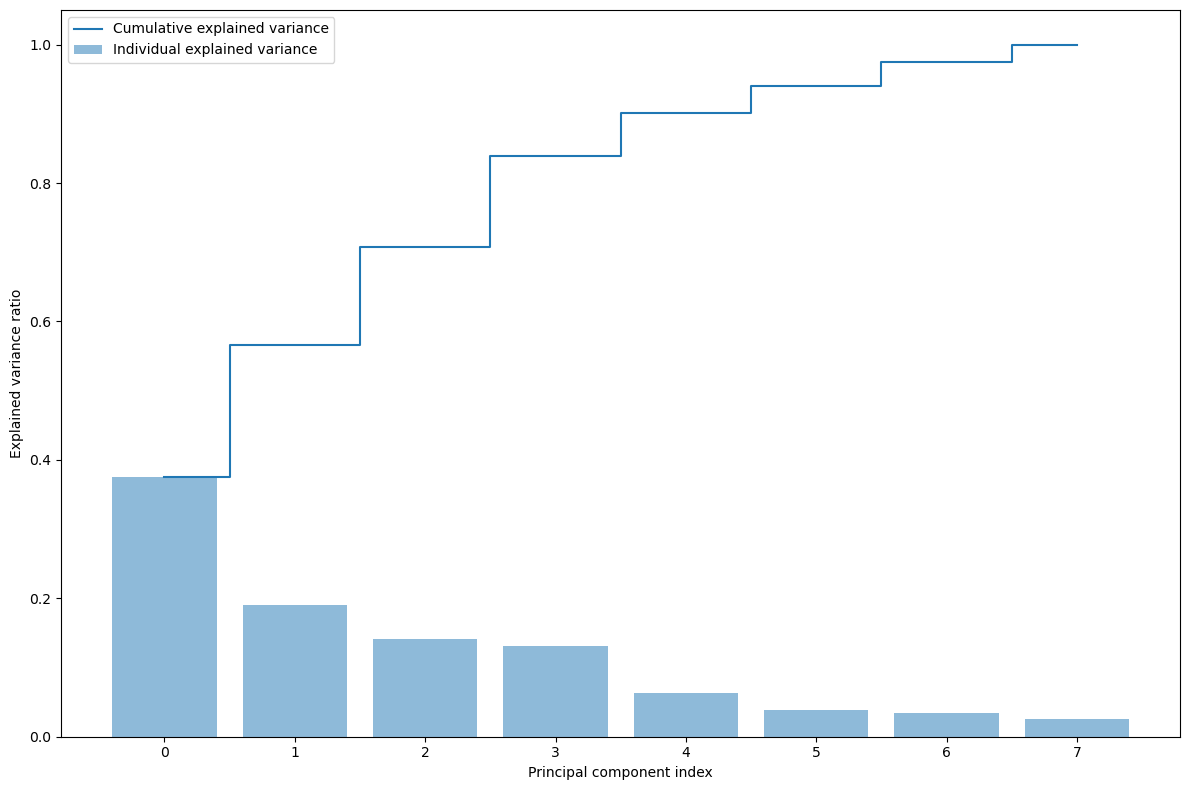

In [194]:
#scree plot
pca = PCA()
#
# Determine transformed features
#
data_pca = pca.fit_transform(bhv_tscaled)
#
# Determine explained variance using explained_variance_ration_ attribute
#
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [11]:
def apply_pca(df, components):
    columns = []
    for i in range(components):
        columns.append(f'column {i + 1}')
    pca = PCA(n_components=components)
    result = pca.fit_transform(df)
    pca_df = pd.DataFrame(data = result, columns=columns)
    return pca_df

In [195]:
bhv_pca = apply_pca(bhv_tscaled, 6)

In [196]:
bhv_pca

,column 1,column 2,column 3,column 4,column 5,column 6
0,-1.753073,-1.086527,-0.185867,-0.048902,0.030459,0.387989
1,0.534133,-0.312996,-0.173574,-0.274828,-0.211217,-0.515366
2,1.597248,0.613792,0.696651,-1.192005,-0.125873,-0.169738
3,2.648252,0.952593,0.542800,-2.753086,1.642182,-0.624985
4,-0.716107,0.358314,-1.639164,0.718733,0.337569,0.412522
...,...,...,...,...,...,...
658,-0.658095,-1.012214,0.955200,0.250420,0.864920,-0.314817
659,-0.767874,-0.704316,1.022200,0.436616,-0.072848,0.698893
660,-6.148413,0.968672,0.952319,2.142453,-2.209746,-0.443416
661,-0.182681,0.164244,-1.025375,-0.440932,-0.128776,0.438015


C:\Users\phini\anaconda3\envs\LHL_env\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.

C:\Users\phini\anaconda3\envs\LHL_env\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.

C:\Users\phini\anaconda3\envs\LHL_env\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.

C:\Users\phini\anaconda3\envs\LHL_env\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

KMeans is known to have a memory leak o

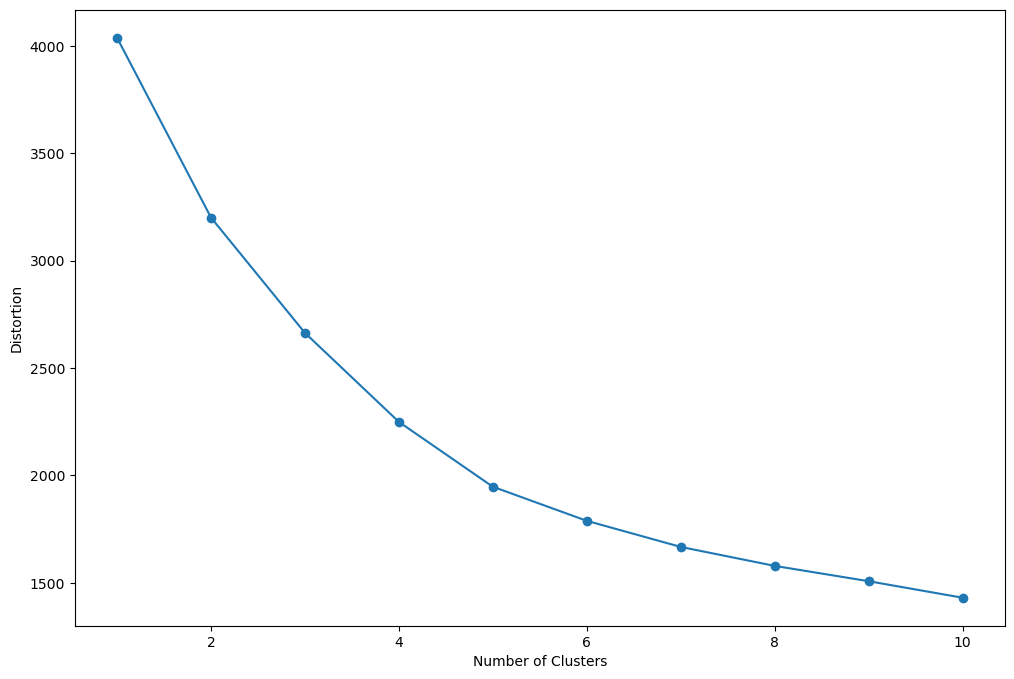

In [197]:
distortions = []
for i in range (1,11):
    km = KMeans(n_clusters = i,
               n_init=10)
    km.fit(bhv_pca)
    distortions.append(km.inertia_)
plt.rcParams["figure.figsize"] = (12,8)    
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show()

In [198]:
km = KMeans(n_clusters=5, init='k-means++')

y_km = km.fit_predict(bhv_pca)

C:\Users\phini\anaconda3\envs\LHL_env\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.



In [111]:
#create plotting function (take it from compass)
def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

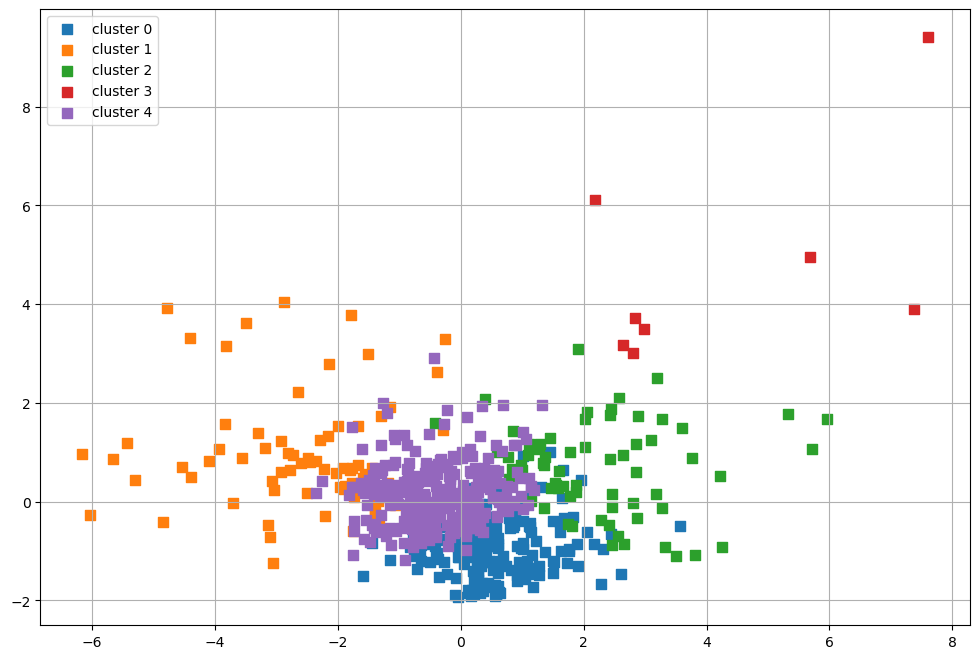

In [200]:
plot_clusters(np.array(bhv_pca), y_km)

In [201]:
bhv_df['cluster'] = y_km

In [202]:
bhv_df_c0 = bhv_df[bhv_df['cluster']==0].drop('cluster', axis=1)
bhv_df_c1 = bhv_df[bhv_df['cluster']==1].drop('cluster', axis=1)
bhv_df_c2 = bhv_df[bhv_df['cluster']==2].drop('cluster', axis=1)
bhv_df_c3 = bhv_df[bhv_df['cluster']==3].drop('cluster', axis=1)
bhv_df_c4 = bhv_df[bhv_df['cluster']==4].drop('cluster', axis=1)

In [203]:
bhv_df_c0.describe()

,income,total_saved,total_debt,avg_trans_amt,total_trans_amt,total_no_transactions,savings_acct_active,credit_acct_active
count,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000
mean,12877.250000,195.666786,7.564464,1.675245,56.913482,62.808036,0.575893,0.433036
std,11727.373448,472.847959,535.427706,18.719743,825.930062,32.874046,0.495314,0.496605
min,0.000000,-926.630000,-2256.030000,-82.692500,-2046.660000,4.000000,0.000000,0.000000
25%,2410.000000,0.000000,0.000000,-7.332279,-299.915000,33.750000,0.000000,0.000000
50%,10961.500000,0.310000,0.000000,-0.115152,-10.880000,60.500000,1.000000,0.000000
75%,19696.750000,136.957500,0.000000,8.949688,486.435000,97.000000,1.000000,1.000000
max,56708.000000,2425.720000,2093.960000,93.296923,2425.720000,132.000000,1.000000,1.000000


In [204]:
bhv_df_c1.describe()

,income,total_saved,total_debt,avg_trans_amt,total_trans_amt,total_no_transactions,savings_acct_active,credit_acct_active
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,55298.250000,61.573472,1776.833611,-55.587875,-5683.670417,114.333333,0.444444,0.666667
std,28416.760375,698.196060,2592.073946,31.324276,2806.441017,45.966307,0.500391,0.474713
min,11944.000000,-2382.800000,-4781.230000,-189.325862,-13384.540000,18.000000,0.000000,0.000000
25%,37419.500000,0.000000,0.000000,-67.389281,-7119.665000,85.500000,0.000000,0.000000
50%,45111.000000,0.000000,1252.175000,-47.330601,-5398.230000,121.000000,0.000000,1.000000
75%,61858.000000,23.520000,2780.315000,-37.206553,-3964.975000,146.250000,1.000000,1.000000
max,144157.000000,3472.810000,9500.000000,-4.963410,-696.400000,243.000000,1.000000,1.000000


In [205]:
bhv_df_c2.describe()

,income,total_saved,total_debt,avg_trans_amt,total_trans_amt,total_no_transactions,savings_acct_active,credit_acct_active
count,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,46285.462687,237.352090,-2874.306866,31.453509,2495.797761,114.000000,0.567164,0.522388
std,20445.740549,579.055281,1983.557027,32.132482,2008.035061,56.160215,0.499208,0.503268
min,0.000000,-463.300000,-9633.490000,-39.950219,-5473.180000,22.000000,0.000000,0.000000
25%,31275.000000,0.000000,-3648.195000,11.261512,1539.390000,65.500000,0.000000,0.000000
50%,46461.000000,2.360000,-2343.320000,23.960000,2097.160000,120.000000,1.000000,1.000000
75%,57667.500000,228.125000,-1655.390000,40.892831,3264.705000,147.000000,1.000000,1.000000
max,98566.000000,2595.780000,293.440000,173.709583,9133.170000,263.000000,1.000000,1.000000


In [206]:
bhv_df_c3.describe()

,income,total_saved,total_debt,avg_trans_amt,total_trans_amt,total_no_transactions,savings_acct_active,credit_acct_active
count,8.000000,8.000000,8.000000,8.000000,8.00000,8.000000,8.000000,8.000000
mean,69583.250000,5830.512500,-1899.587500,46.440468,4598.23000,137.375000,0.875000,0.125000
std,20941.526133,2504.473834,3633.634591,54.296155,2963.23149,53.138465,0.353553,0.353553
min,34797.000000,3671.030000,-9557.000000,-0.567194,-78.84000,40.000000,0.000000,0.000000
25%,59083.250000,4162.465000,-2671.072500,24.059108,3438.78750,116.500000,1.000000,0.000000
50%,72163.000000,4681.955000,0.000000,33.989497,4314.18500,135.500000,1.000000,0.000000
75%,80376.500000,7063.532500,0.000000,41.620401,5712.58250,179.750000,1.000000,0.000000
max,102286.000000,11079.850000,1241.510000,175.163000,9804.75000,201.000000,1.000000,1.000000


In [207]:
bhv_df_c4.describe()

,income,total_saved,total_debt,avg_trans_amt,total_trans_amt,total_no_transactions,savings_acct_active,credit_acct_active
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000
mean,16414.232877,174.159486,375.935445,-9.915723,-1439.227534,159.318493,0.578767,0.825342
std,12285.363208,588.954810,833.865466,11.776563,1715.360654,32.509020,0.494604,0.380326
min,0.000000,-2406.270000,-2152.330000,-41.588788,-6202.150000,95.000000,0.000000,0.000000
25%,7147.500000,0.000000,0.000000,-18.921191,-2730.987500,136.000000,0.000000,1.000000
50%,13424.500000,0.000000,237.140000,-8.321191,-1349.720000,159.500000,1.000000,1.000000
75%,24306.500000,352.757500,911.342500,-0.712592,-102.882500,182.000000,1.000000,1.000000
max,61885.000000,2610.340000,3229.660000,10.952857,2161.310000,254.000000,1.000000,1.000000


In [220]:
bhv_tscaled['cluster'] = y_km
bhv_scaled0 = bhv_tscaled[bhv_tscaled['cluster']==0].drop('cluster', axis=1)
bhv_scaled1 = bhv_tscaled[bhv_tscaled['cluster']==1].drop('cluster', axis=1)
bhv_scaled2 = bhv_tscaled[bhv_tscaled['cluster']==2].drop('cluster', axis=1)
bhv_scaled3 = bhv_tscaled[bhv_tscaled['cluster']==3].drop('cluster', axis=1)
bhv_scaled4 = bhv_tscaled[bhv_tscaled['cluster']==4].drop('cluster', axis=1)

In [212]:
bhv_df_c0.describe()

,income,total_saved,total_debt,avg_trans_amt,total_trans_amt,total_no_transactions,savings_acct_active,credit_acct_active
count,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000
mean,12877.250000,195.666786,7.564464,1.675245,56.913482,62.808036,0.575893,0.433036
std,11727.373448,472.847959,535.427706,18.719743,825.930062,32.874046,0.495314,0.496605
min,0.000000,-926.630000,-2256.030000,-82.692500,-2046.660000,4.000000,0.000000,0.000000
25%,2410.000000,0.000000,0.000000,-7.332279,-299.915000,33.750000,0.000000,0.000000
50%,10961.500000,0.310000,0.000000,-0.115152,-10.880000,60.500000,1.000000,0.000000
75%,19696.750000,136.957500,0.000000,8.949688,486.435000,97.000000,1.000000,1.000000
max,56708.000000,2425.720000,2093.960000,93.296923,2425.720000,132.000000,1.000000,1.000000


In [211]:
bhv_scaled0.describe()

,income,total_saved,total_debt,avg_trans_amt,total_trans_amt,total_no_transactions,savings_acct,credit_acct
count,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000
mean,-0.460413,-0.055168,-0.023433,0.261126,0.362855,-0.959914,0.629464,0.535714
std,0.528067,0.541543,0.312615,0.628779,0.305471,0.582500,0.484030,0.499840
min,-1.040258,-1.340510,-1.345056,-2.572711,-0.415153,-2.001942,0.000000,0.000000
25%,-0.931739,-0.279261,-0.027849,-0.041429,0.230882,-1.474797,0.000000,0.000000
50%,-0.546677,-0.278906,-0.027849,0.200988,0.337781,-1.000810,1.000000,1.000000
75%,-0.153341,-0.122407,-0.027849,0.505468,0.521714,-0.354062,1.000000,1.000000
max,1.513225,2.498863,1.194730,3.338615,1.238959,0.266108,1.000000,1.000000


In [216]:
fig = go.Figure()

fig.add_trace(go.Scatterpolar(r = bhv_scaled0.mean(), theta = bhv_scaled0.columns,fill='toself'))

fig.update_layout(title = 'Behavior Cluster 0',     
    polar=dict(
    radialaxis=dict(
    visible=True,
    range=[-1,1])))

fig.show()

In [217]:
bhv_df_c1.describe()

,income,total_saved,total_debt,avg_trans_amt,total_trans_amt,total_no_transactions,savings_acct_active,credit_acct_active
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,55298.250000,61.573472,1776.833611,-55.587875,-5683.670417,114.333333,0.444444,0.666667
std,28416.760375,698.196060,2592.073946,31.324276,2806.441017,45.966307,0.500391,0.474713
min,11944.000000,-2382.800000,-4781.230000,-189.325862,-13384.540000,18.000000,0.000000,0.000000
25%,37419.500000,0.000000,0.000000,-67.389281,-7119.665000,85.500000,0.000000,0.000000
50%,45111.000000,0.000000,1252.175000,-47.330601,-5398.230000,121.000000,0.000000,1.000000
75%,61858.000000,23.520000,2780.315000,-37.206553,-3964.975000,146.250000,1.000000,1.000000
max,144157.000000,3472.810000,9500.000000,-4.963410,-696.400000,243.000000,1.000000,1.000000


In [221]:
bhv_scaled1.describe()

,income,total_saved,total_debt,avg_trans_amt,total_trans_amt,total_no_transactions,savings_acct,credit_acct
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,1.449746,-0.208742,1.009573,-1.662291,-1.760303,-0.046930,0.541667,0.611111
std,1.279568,0.799629,1.513409,1.052154,1.037964,0.814483,0.501757,0.490919
min,-0.502436,-3.008230,-2.819419,-6.154429,-4.608474,-1.753874,0.000000,0.000000
25%,0.644691,-0.279261,-0.027849,-2.058689,-2.291407,-0.557832,0.000000,0.000000
50%,0.991028,-0.279261,0.703246,-1.384936,-1.654733,0.071197,1.000000,1.000000
75%,1.745122,-0.252324,1.595466,-1.044879,-1.124643,0.518605,1.000000,1.000000
max,5.450933,3.698073,5.518823,0.038139,0.084241,2.232932,1.000000,1.000000


In [227]:
fig = go.Figure()

fig.add_trace(go.Scatterpolar(r = bhv_scaled1.mean(), theta = bhv_scaled1.columns,fill='toself'))

fig.update_layout(title = 'Behavior Cluster 1',     
    polar=dict(
    radialaxis=dict(
    visible=True,
    range=[-2,2])))

fig.show()

In [228]:
bhv_df_c2.describe()

,income,total_saved,total_debt,avg_trans_amt,total_trans_amt,total_no_transactions,savings_acct_active,credit_acct_active
count,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,46285.462687,237.352090,-2874.306866,31.453509,2495.797761,114.000000,0.567164,0.522388
std,20445.740549,579.055281,1983.557027,32.132482,2008.035061,56.160215,0.499208,0.503268
min,0.000000,-463.300000,-9633.490000,-39.950219,-5473.180000,22.000000,0.000000,0.000000
25%,31275.000000,0.000000,-3648.195000,11.261512,1539.390000,65.500000,0.000000,0.000000
50%,46461.000000,2.360000,-2343.320000,23.960000,2097.160000,120.000000,1.000000,1.000000
75%,57667.500000,228.125000,-1655.390000,40.892831,3264.705000,147.000000,1.000000,1.000000
max,98566.000000,2595.780000,293.440000,173.709583,9133.170000,263.000000,1.000000,1.000000


In [229]:
bhv_scaled2.describe()

,income,total_saved,total_debt,avg_trans_amt,total_trans_amt,total_no_transactions,savings_acct,credit_acct
count,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,1.043913,-0.007427,-1.706043,1.261351,1.264878,-0.052837,0.671642,0.626866
std,0.920644,0.663179,1.158120,1.079301,0.742673,0.995110,0.473160,0.487288
min,-1.040258,-0.809869,-5.652461,-1.137036,-1.682453,-1.682997,0.000000,0.000000
25%,0.368012,-0.279261,-2.157885,0.583120,0.911150,-0.912215,0.000000,0.000000
50%,1.051817,-0.276558,-1.396021,1.009650,1.117441,0.053478,1.000000,1.000000
75%,1.556430,-0.017995,-0.994366,1.578409,1.549258,0.531895,1.000000,1.000000
max,3.398033,2.693629,0.143478,6.039604,3.719713,2.587314,1.000000,1.000000


In [230]:
fig = go.Figure()

fig.add_trace(go.Scatterpolar(r = bhv_scaled2.mean(), theta = bhv_scaled2.columns,fill='toself'))

fig.update_layout(title = 'Behavior Cluster 2',     
    polar=dict(
    radialaxis=dict(
    visible=True,
    range=[-2,2])))

fig.show()

In [231]:
bhv_df_c3.describe()

,income,total_saved,total_debt,avg_trans_amt,total_trans_amt,total_no_transactions,savings_acct_active,credit_acct_active
count,8.000000,8.000000,8.000000,8.000000,8.00000,8.000000,8.000000,8.000000
mean,69583.250000,5830.512500,-1899.587500,46.440468,4598.23000,137.375000,0.875000,0.125000
std,20941.526133,2504.473834,3633.634591,54.296155,2963.23149,53.138465,0.353553,0.353553
min,34797.000000,3671.030000,-9557.000000,-0.567194,-78.84000,40.000000,0.000000,0.000000
25%,59083.250000,4162.465000,-2671.072500,24.059108,3438.78750,116.500000,1.000000,0.000000
50%,72163.000000,4681.955000,0.000000,33.989497,4314.18500,135.500000,1.000000,0.000000
75%,80376.500000,7063.532500,0.000000,41.620401,5712.58250,179.750000,1.000000,0.000000
max,102286.000000,11079.850000,1241.510000,175.163000,9804.75000,201.000000,1.000000,1.000000


In [232]:
bhv_scaled3.describe()

,income,total_saved,total_debt,avg_trans_amt,total_trans_amt,total_no_transactions,savings_acct,credit_acct
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,2.092980,6.398298,-1.136943,1.764749,2.042463,0.361348,0.375000,0.375000
std,0.942968,2.868320,2.121535,1.823759,1.095953,0.941568,0.517549,0.517549
min,0.526603,3.925090,-5.607802,0.185804,0.312646,-1.364053,0.000000,0.000000
25%,1.620179,4.487920,-1.587382,1.012979,1.613643,-0.008539,0.000000,0.000000
50%,2.209142,5.082880,-0.027849,1.346532,1.937409,0.328125,0.000000,0.000000
75%,2.578985,7.810450,-0.027849,1.602847,2.454607,1.112196,1.000000,1.000000
max,3.565540,12.410251,0.697019,6.088423,3.968098,1.488728,1.000000,1.000000


In [236]:
fig = go.Figure()

fig.add_trace(go.Scatterpolar(r = bhv_scaled3.mean(), theta = bhv_scaled3.columns,fill='toself'))

fig.update_layout(title = 'Behavior Cluster 3',     
    polar=dict(
    radialaxis=dict(
    visible=True,
    range=[-2,7])))

fig.show()

In [237]:
bhv_df_c4.describe()

,income,total_saved,total_debt,avg_trans_amt,total_trans_amt,total_no_transactions,savings_acct_active,credit_acct_active
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000
mean,16414.232877,174.159486,375.935445,-9.915723,-1439.227534,159.318493,0.578767,0.825342
std,12285.363208,588.954810,833.865466,11.776563,1715.360654,32.509020,0.494604,0.380326
min,0.000000,-2406.270000,-2152.330000,-41.588788,-6202.150000,95.000000,0.000000,0.000000
25%,7147.500000,0.000000,0.000000,-18.921191,-2730.987500,136.000000,0.000000,1.000000
50%,13424.500000,0.000000,237.140000,-8.321191,-1349.720000,159.500000,1.000000,1.000000
75%,24306.500000,352.757500,911.342500,-0.712592,-102.882500,182.000000,1.000000,1.000000
max,61885.000000,2610.340000,3229.660000,10.952857,2161.310000,254.000000,1.000000,1.000000


In [238]:
bhv_scaled4.describe()

,income,total_saved,total_debt,avg_trans_amt,total_trans_amt,total_no_transactions,savings_acct,credit_acct
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000
mean,-0.301148,-0.079800,0.191644,-0.128204,-0.190494,0.750168,0.503425,0.726027
std,0.553193,0.674517,0.486861,0.395564,0.634427,0.576032,0.500847,0.446761
min,-1.040258,-3.035110,-1.284509,-1.192074,-1.952063,-0.389500,0.000000,0.000000
25%,-0.718416,-0.279261,-0.027849,-0.430690,-0.668252,0.336984,0.000000,0.000000
50%,-0.435771,-0.279261,0.110607,-0.074646,-0.157389,0.753384,1.000000,1.000000
75%,0.054230,0.124744,0.504247,0.180920,0.303754,1.152065,1.000000,1.000000
max,1.746338,2.710305,1.857821,0.572752,1.141167,2.427842,1.000000,1.000000


In [240]:
fig = go.Figure()

fig.add_trace(go.Scatterpolar(r = bhv_scaled4.mean(), theta = bhv_scaled4.columns,fill='toself'))

fig.update_layout(title = 'Behavior Cluster 4',     
    polar=dict(
    radialaxis=dict(
    visible=True,
    range=[-2,2])))

fig.show()

In [241]:
fig = go.Figure()

fig.add_trace(go.Scatterpolar(r = bhv_scaled0.mean(), theta = bhv_scaled0.columns,fill='toself', name='Behavior cluster 0'))
fig.add_trace(go.Scatterpolar(r = bhv_scaled1.mean(), theta = bhv_scaled1.columns,fill='toself', name='Behavior cluster 1'))
fig.add_trace(go.Scatterpolar(r = bhv_scaled2.mean(), theta = bhv_scaled2.columns,fill='toself', name='Behavior cluster 2'))
fig.add_trace(go.Scatterpolar(r = bhv_scaled3.mean(), theta = bhv_scaled3.columns,fill='toself', name='Behavior cluster 3'))
fig.add_trace(go.Scatterpolar(r = bhv_scaled4.mean(), theta = bhv_scaled4.columns,fill='toself', name='Behavior cluster 4'))

fig.update_layout(title = 'All Behavior Clusters mean', showlegend=True)

fig.show()